   social_media_minutes  gaming_hours_per_week  introversion_extraversion  \
0                   120                      4                          2   
1                   506                     12                          3   
2                    60                      7                          3   
3                   120                      2                          5   
4                   120                     19                          3   

   sleep_hours  
0    10.000000  
1     7.700868  
2    10.000000  
3    10.000000  
4     9.232923  


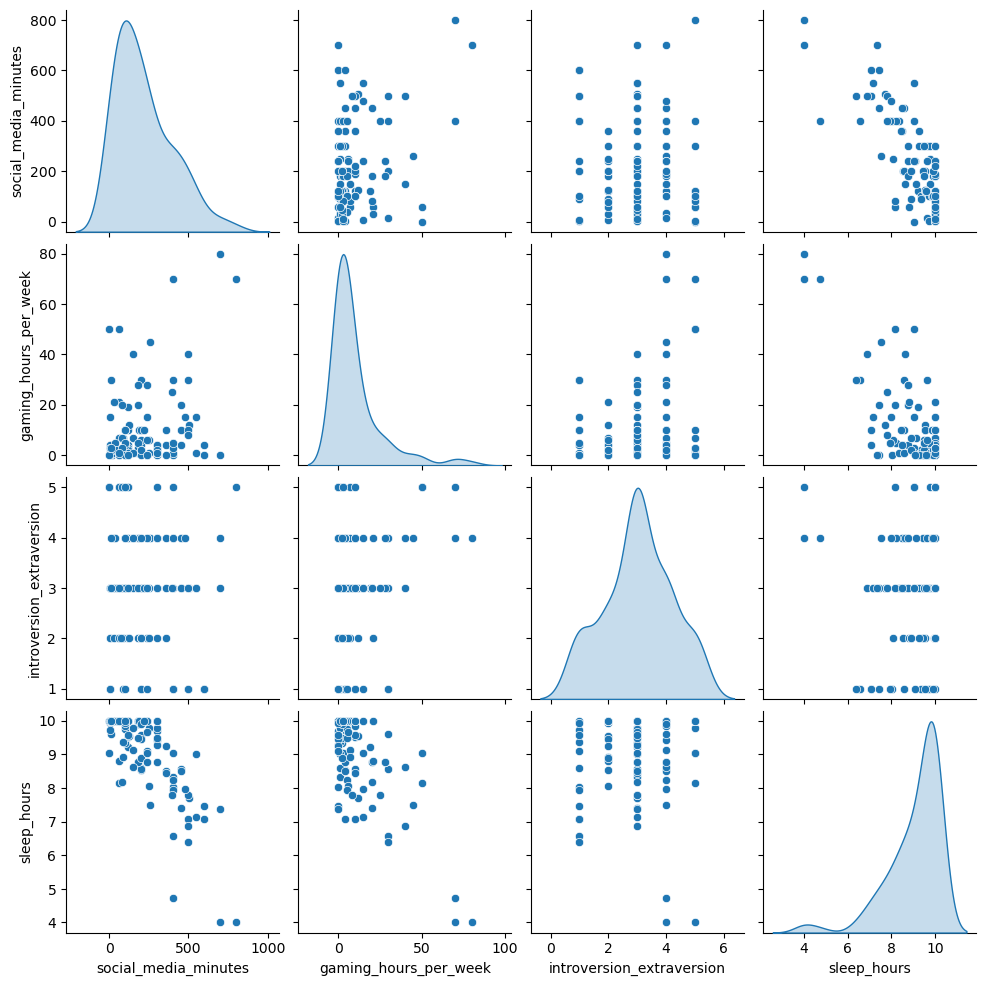

Mean Absolute Error: 0.2884656212020268
Mean Squared Error: 0.1404334527479117
R² Score: 0.9235342680544927
                     Feature  Coefficient
0       social_media_minutes    -0.004088
1      gaming_hours_per_week    -0.046804
2  introversion_extraversion     0.158532


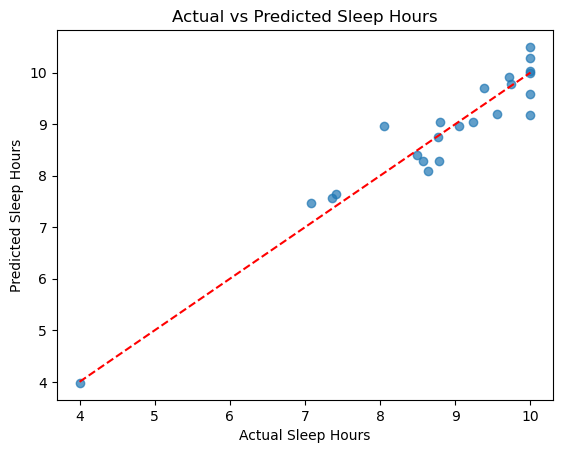

In [1]:
# 📘 Sleep Health Report - Regression (Supervised Learning)

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load dataset
file_path = "Data Collection for ML mini project (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Step 3: Select required features
cols = {
    "social_media": "  Daily Social Media Minutes  \n(Provide values in integer between 0-600)",
    "gaming_hours": "  Gaming hours per week  \n(Provide Values in integer between 0-50)",
    "intro_extro": "  Introversion extraversion  "
}
data = df[[cols["social_media"], cols["gaming_hours"], cols["intro_extro"]]].copy()

# Step 4: Clean column names
data.columns = ["social_media_minutes", "gaming_hours_per_week", "introversion_extraversion"]

# Step 5: Convert to numeric (handle messy entries like '120 cm')
for col in data.columns:
    data[col] = pd.to_numeric(data[col].astype(str).str.extract("(\d+)")[0], errors="coerce")

# Step 6: Handle missing values (fill with median)
data = data.fillna(data.median())

# Step 7: Create synthetic target (sleep_hours)
# Assume: more social media/gaming → less sleep, more introversion → more sleep
np.random.seed(42)
data["sleep_hours"] = (
    10
    - 0.005 * data["social_media_minutes"]
    - 0.05 * data["gaming_hours_per_week"]
    + 0.3 * data["introversion_extraversion"]
    + np.random.normal(0, 0.5, len(data))
).clip(4, 10)  # limit between 4-10 hrs

# Step 8: Explore dataset
print(data.head())
sns.pairplot(data, diag_kind="kde")
plt.show()

# Step 9: Train-test split
X = data[["social_media_minutes", "gaming_hours_per_week", "introversion_extraversion"]]
y = data["sleep_hours"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10: Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 11: Predictions
y_pred = model.predict(X_test)

# Step 12: Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 13: Coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coef_df)

# Step 14: Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("Actual vs Predicted Sleep Hours")
plt.plot([4, 10], [4, 10], 'r--')
plt.show()


In [2]:
# --- Step 1: Import libraries ---
import pandas as pd
import numpy as np

# --- Step 2: Load dataset ---
file_path = "Data Collection for ML mini project (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# --- Step 3: Select relevant columns ---
selected_cols = [
    "  Daily Social Media Minutes  \n(Provide values in integer between 0-600)",
    "  Gaming hours per week  \n(Provide Values in integer between 0-50)",
    "  Introversion extraversion  "
]

sleep_df = df[selected_cols].copy()

# --- Step 4: Clean column names ---
sleep_df.columns = [
    "daily_social_media_minutes",
    "gaming_hours_per_week",
    "introversion_extraversion"
]

# --- Step 5: Convert text to numeric ---
for col in sleep_df.columns:
    sleep_df[col] = pd.to_numeric(
        sleep_df[col].astype(str).str.extract(r"(\d+)")[0],
        errors="coerce"
    )

# --- Step 6: Handle missing values (using median) ---
sleep_df.fillna(sleep_df.median(), inplace=True)

# --- Step 7: Create synthetic target variable (sleep_hours) ---
np.random.seed(42)
sleep_df["sleep_hours"] = (
    10
    - 0.005 * sleep_df["daily_social_media_minutes"]
    - 0.05 * sleep_df["gaming_hours_per_week"]
    + 0.3 * sleep_df["introversion_extraversion"]
    + np.random.normal(0, 0.5, len(sleep_df))
).clip(4, 10)  # Sleep between 4 and 10 hours

# --- Step 8: Check preprocessed dataset ---
print(sleep_df.head())
print("\nDataset shape:", sleep_df.shape)


   daily_social_media_minutes  gaming_hours_per_week  \
0                         120                      4   
1                         506                     12   
2                          60                      7   
3                         120                      2   
4                         120                     19   

   introversion_extraversion  sleep_hours  
0                          2    10.000000  
1                          3     7.700868  
2                          3    10.000000  
3                          5    10.000000  
4                          3     9.232923  

Dataset shape: (111, 4)


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Data Collection for ML mini project (Responses) - Form Responses 1.csv"
df = pd.read_csv(file_path)

# Show shape and first rows
print("Original dataset shape:", df.shape)
df.head()


Original dataset shape: (111, 73)


,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


In [4]:
# Select relevant columns
selected_cols = [
    "  Daily Social Media Minutes  \n(Provide values in integer between 0-600)",
    "  Gaming hours per week  \n(Provide Values in integer between 0-50)",
    "  Introversion extraversion  "
]
sleep_df = df[selected_cols].copy()

# Clean column names
sleep_df.columns = [
    "daily_social_media_minutes",
    "gaming_hours_per_week",
    "introversion_extraversion"
]

# Convert to numeric
for col in sleep_df.columns:
    sleep_df[col] = pd.to_numeric(
        sleep_df[col].astype(str).str.extract(r"(\d+)")[0],
        errors="coerce"
    )

# Fill missing values
sleep_df.fillna(sleep_df.median(), inplace=True)

# Create synthetic target variable
np.random.seed(42)
sleep_df["sleep_hours"] = (
    10
    - 0.005 * sleep_df["daily_social_media_minutes"]
    - 0.05 * sleep_df["gaming_hours_per_week"]
    + 0.3 * sleep_df["introversion_extraversion"]
    + np.random.normal(0, 0.5, len(sleep_df))
).clip(4, 10)

# Check result
print("Cleaned dataset shape:", sleep_df.shape)
sleep_df.head()


Cleaned dataset shape: (111, 4)


,daily_social_media_minutes,gaming_hours_per_week,introversion_extraversion,sleep_hours
0,120,4,2,10.000000
1,506,12,3,7.700868
2,60,7,3,10.000000
3,120,2,5,10.000000
4,120,19,3,9.232923


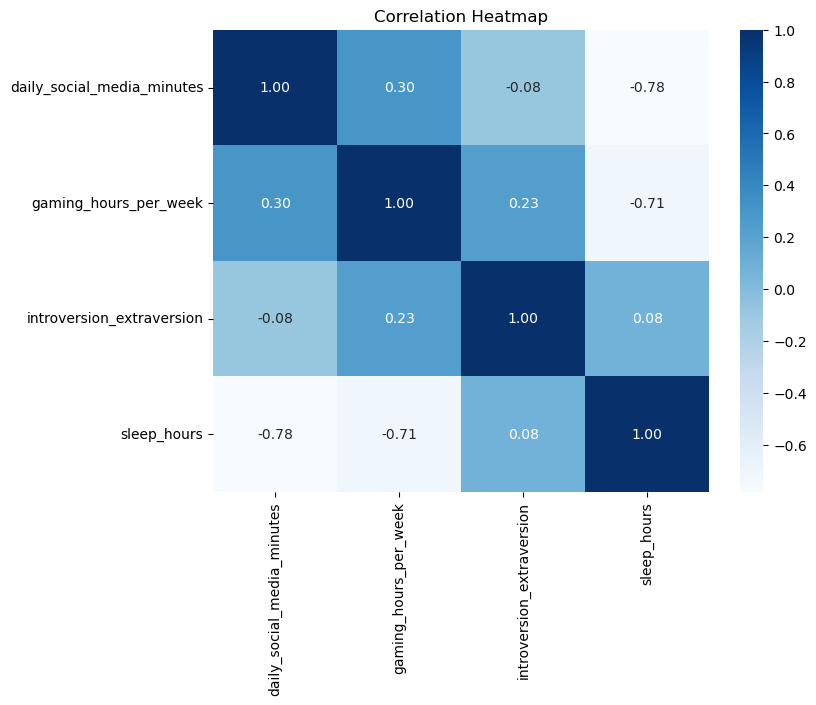

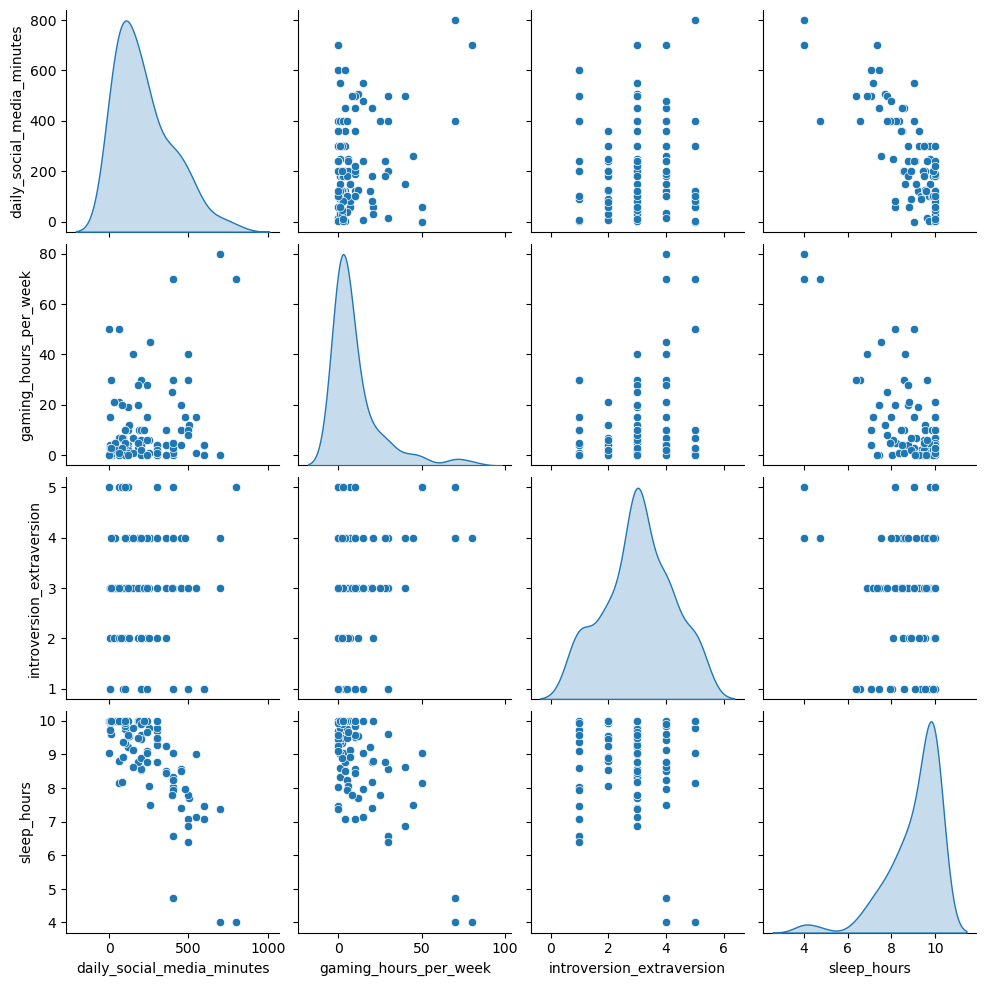

In [5]:
# Summary statistics
sleep_df.describe()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(sleep_df.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(sleep_df, diag_kind="kde")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split

# Features & Target
X = sleep_df[["daily_social_media_minutes", "gaming_hours_per_week", "introversion_extraversion"]]
y = sleep_df["sleep_hours"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (88, 3)
Test size: (23, 3)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation:
MAE: 0.29
MSE: 0.14
R² Score: 0.92


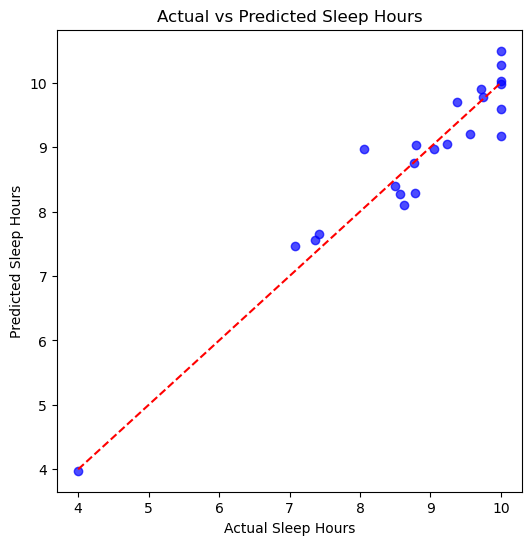

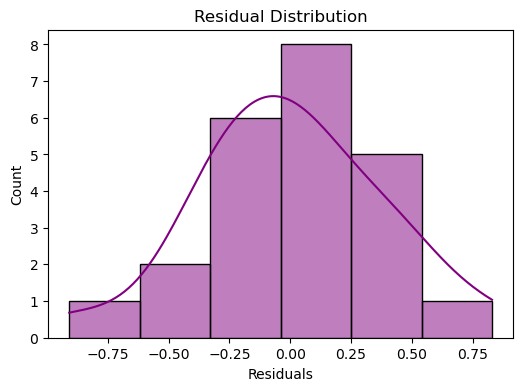

In [8]:
# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([4, 10], [4, 10], "r--")  # perfect line
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("Actual vs Predicted Sleep Hours")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()


In [9]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("Model Intercept:", model.intercept_)
print("\nFeature Coefficients:")
print(coeff_df)


Model Intercept: 9.950366537170815

Feature Coefficients:
                      Feature  Coefficient
0  daily_social_media_minutes    -0.004088
1       gaming_hours_per_week    -0.046804
2   introversion_extraversion     0.158532
